## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.033215
0:	learn: 0.9871427	total: 58.6ms	remaining: 58.5s
1:	learn: 0.9673063	total: 59.6ms	remaining: 29.8s
2:	learn: 0.9458673	total: 60.6ms	remaining: 20.1s
3:	learn: 0.9288760	total: 61.6ms	remaining: 15.3s
4:	learn: 0.9112297	total: 62.7ms	remaining: 12.5s
5:	learn: 0.8939415	total: 63.7ms	remaining: 10.5s
6:	learn: 0.8778096	total: 64.7ms	remaining: 9.17s
7:	learn: 0.8614690	total: 65.6ms	remaining: 8.13s
8:	learn: 0.8457869	total: 66.5ms	remaining: 7.32s
9:	learn: 0.8296418	total: 67.4ms	remaining: 6.67s
10:	learn: 0.8125982	total: 68.3ms	remaining: 6.14s
11:	learn: 0.7982501	total: 69ms	remaining: 5.68s
12:	learn: 0.7833941	total: 69.7ms	remaining: 5.29s
13:	learn: 0.7687136	total: 70.6ms	remaining: 4.97s
14:	learn: 0.7546969	total: 71.3ms	remaining: 4.68s
15:	learn: 0.7391697	total: 72.1ms	remaining: 4.43s
16:	learn: 0.7270297	total: 73.5ms	remaining: 4.25s
17:	learn: 0.7146743	total: 74.3ms	remaining: 4.05s
18:	learn: 0.7025472	total: 75.1ms	remaining: 

59:	learn: 0.4091775	total: 109ms	remaining: 1.71s
60:	learn: 0.4055319	total: 110ms	remaining: 1.69s
61:	learn: 0.4016074	total: 111ms	remaining: 1.68s
62:	learn: 0.3985890	total: 112ms	remaining: 1.66s
63:	learn: 0.3946652	total: 112ms	remaining: 1.64s
64:	learn: 0.3907601	total: 113ms	remaining: 1.63s
65:	learn: 0.3877952	total: 114ms	remaining: 1.61s
66:	learn: 0.3842854	total: 115ms	remaining: 1.6s
67:	learn: 0.3814809	total: 116ms	remaining: 1.58s
68:	learn: 0.3786184	total: 116ms	remaining: 1.57s
69:	learn: 0.3759310	total: 117ms	remaining: 1.56s
70:	learn: 0.3721743	total: 118ms	remaining: 1.54s
71:	learn: 0.3695330	total: 119ms	remaining: 1.53s
72:	learn: 0.3671203	total: 120ms	remaining: 1.52s
73:	learn: 0.3639259	total: 121ms	remaining: 1.51s
74:	learn: 0.3607660	total: 122ms	remaining: 1.5s
75:	learn: 0.3579217	total: 122ms	remaining: 1.49s
76:	learn: 0.3554617	total: 123ms	remaining: 1.48s
77:	learn: 0.3517356	total: 124ms	remaining: 1.46s
78:	learn: 0.3495613	total: 125ms

160:	learn: 0.2476610	total: 191ms	remaining: 997ms
161:	learn: 0.2471339	total: 192ms	remaining: 995ms
162:	learn: 0.2468204	total: 193ms	remaining: 991ms
163:	learn: 0.2460875	total: 194ms	remaining: 988ms
164:	learn: 0.2457296	total: 195ms	remaining: 985ms
165:	learn: 0.2449581	total: 195ms	remaining: 982ms
166:	learn: 0.2443852	total: 196ms	remaining: 979ms
167:	learn: 0.2437368	total: 197ms	remaining: 976ms
168:	learn: 0.2432011	total: 198ms	remaining: 974ms
169:	learn: 0.2427707	total: 199ms	remaining: 971ms
170:	learn: 0.2420657	total: 200ms	remaining: 968ms
171:	learn: 0.2412869	total: 201ms	remaining: 965ms
172:	learn: 0.2405629	total: 201ms	remaining: 962ms
173:	learn: 0.2399744	total: 202ms	remaining: 959ms
174:	learn: 0.2393926	total: 203ms	remaining: 957ms
175:	learn: 0.2387326	total: 204ms	remaining: 955ms
176:	learn: 0.2382258	total: 205ms	remaining: 952ms
177:	learn: 0.2378945	total: 205ms	remaining: 949ms
178:	learn: 0.2375340	total: 206ms	remaining: 946ms
179:	learn: 

291:	learn: 0.1881599	total: 299ms	remaining: 725ms
292:	learn: 0.1876991	total: 300ms	remaining: 724ms
293:	learn: 0.1872905	total: 301ms	remaining: 722ms
294:	learn: 0.1869250	total: 302ms	remaining: 721ms
295:	learn: 0.1865255	total: 303ms	remaining: 720ms
296:	learn: 0.1861887	total: 303ms	remaining: 718ms
297:	learn: 0.1860366	total: 304ms	remaining: 717ms
298:	learn: 0.1856284	total: 305ms	remaining: 716ms
299:	learn: 0.1850256	total: 306ms	remaining: 714ms
300:	learn: 0.1848617	total: 307ms	remaining: 713ms
301:	learn: 0.1843207	total: 308ms	remaining: 711ms
302:	learn: 0.1842717	total: 308ms	remaining: 710ms
303:	learn: 0.1836817	total: 309ms	remaining: 708ms
304:	learn: 0.1830958	total: 310ms	remaining: 707ms
305:	learn: 0.1825403	total: 311ms	remaining: 705ms
306:	learn: 0.1822368	total: 312ms	remaining: 705ms
307:	learn: 0.1816583	total: 313ms	remaining: 704ms
308:	learn: 0.1815476	total: 314ms	remaining: 703ms
309:	learn: 0.1808815	total: 315ms	remaining: 702ms
310:	learn: 

386:	learn: 0.1562726	total: 382ms	remaining: 604ms
387:	learn: 0.1558098	total: 382ms	remaining: 603ms
388:	learn: 0.1555881	total: 383ms	remaining: 602ms
389:	learn: 0.1554783	total: 384ms	remaining: 601ms
390:	learn: 0.1552219	total: 385ms	remaining: 600ms
391:	learn: 0.1548505	total: 386ms	remaining: 598ms
392:	learn: 0.1544341	total: 386ms	remaining: 597ms
393:	learn: 0.1540707	total: 387ms	remaining: 596ms
394:	learn: 0.1537695	total: 388ms	remaining: 594ms
395:	learn: 0.1535099	total: 389ms	remaining: 593ms
396:	learn: 0.1532489	total: 390ms	remaining: 592ms
397:	learn: 0.1530036	total: 391ms	remaining: 591ms
398:	learn: 0.1526063	total: 392ms	remaining: 590ms
399:	learn: 0.1523574	total: 392ms	remaining: 589ms
400:	learn: 0.1519680	total: 393ms	remaining: 587ms
401:	learn: 0.1516945	total: 394ms	remaining: 586ms
402:	learn: 0.1513701	total: 395ms	remaining: 585ms
403:	learn: 0.1511451	total: 396ms	remaining: 584ms
404:	learn: 0.1507742	total: 397ms	remaining: 583ms
405:	learn: 

512:	learn: 0.1236208	total: 490ms	remaining: 465ms
513:	learn: 0.1233969	total: 491ms	remaining: 464ms
514:	learn: 0.1232791	total: 491ms	remaining: 463ms
515:	learn: 0.1229968	total: 492ms	remaining: 462ms
516:	learn: 0.1229405	total: 493ms	remaining: 461ms
517:	learn: 0.1226645	total: 494ms	remaining: 460ms
518:	learn: 0.1224397	total: 495ms	remaining: 459ms
519:	learn: 0.1222739	total: 495ms	remaining: 457ms
520:	learn: 0.1218650	total: 496ms	remaining: 456ms
521:	learn: 0.1215763	total: 497ms	remaining: 455ms
522:	learn: 0.1214364	total: 498ms	remaining: 454ms
523:	learn: 0.1211659	total: 499ms	remaining: 453ms
524:	learn: 0.1210698	total: 499ms	remaining: 452ms
525:	learn: 0.1210284	total: 500ms	remaining: 451ms
526:	learn: 0.1208575	total: 501ms	remaining: 450ms
527:	learn: 0.1207634	total: 502ms	remaining: 449ms
528:	learn: 0.1207509	total: 503ms	remaining: 448ms
529:	learn: 0.1204784	total: 504ms	remaining: 447ms
530:	learn: 0.1204622	total: 504ms	remaining: 446ms
531:	learn: 

609:	learn: 0.1055807	total: 572ms	remaining: 366ms
610:	learn: 0.1054370	total: 573ms	remaining: 365ms
611:	learn: 0.1052245	total: 574ms	remaining: 364ms
612:	learn: 0.1050254	total: 575ms	remaining: 363ms
613:	learn: 0.1048741	total: 576ms	remaining: 362ms
614:	learn: 0.1047273	total: 576ms	remaining: 361ms
615:	learn: 0.1045682	total: 577ms	remaining: 360ms
616:	learn: 0.1043257	total: 578ms	remaining: 359ms
617:	learn: 0.1040873	total: 579ms	remaining: 358ms
618:	learn: 0.1039317	total: 580ms	remaining: 357ms
619:	learn: 0.1036942	total: 580ms	remaining: 356ms
620:	learn: 0.1035861	total: 581ms	remaining: 355ms
621:	learn: 0.1034065	total: 582ms	remaining: 354ms
622:	learn: 0.1031578	total: 583ms	remaining: 353ms
623:	learn: 0.1029894	total: 584ms	remaining: 352ms
624:	learn: 0.1029125	total: 584ms	remaining: 351ms
625:	learn: 0.1028962	total: 585ms	remaining: 350ms
626:	learn: 0.1027654	total: 586ms	remaining: 349ms
627:	learn: 0.1025418	total: 587ms	remaining: 348ms
628:	learn: 

738:	learn: 0.0870545	total: 680ms	remaining: 240ms
739:	learn: 0.0869550	total: 681ms	remaining: 239ms
740:	learn: 0.0868722	total: 682ms	remaining: 238ms
741:	learn: 0.0867153	total: 682ms	remaining: 237ms
742:	learn: 0.0866539	total: 683ms	remaining: 236ms
743:	learn: 0.0865693	total: 684ms	remaining: 235ms
744:	learn: 0.0863471	total: 685ms	remaining: 234ms
745:	learn: 0.0861670	total: 686ms	remaining: 234ms
746:	learn: 0.0861145	total: 687ms	remaining: 233ms
747:	learn: 0.0859756	total: 688ms	remaining: 232ms
748:	learn: 0.0858019	total: 688ms	remaining: 231ms
749:	learn: 0.0856036	total: 689ms	remaining: 230ms
750:	learn: 0.0854821	total: 690ms	remaining: 229ms
751:	learn: 0.0854117	total: 691ms	remaining: 228ms
752:	learn: 0.0852140	total: 692ms	remaining: 227ms
753:	learn: 0.0851089	total: 692ms	remaining: 226ms
754:	learn: 0.0850687	total: 693ms	remaining: 225ms
755:	learn: 0.0849419	total: 694ms	remaining: 224ms
756:	learn: 0.0848798	total: 695ms	remaining: 223ms
757:	learn: 

838:	learn: 0.0752932	total: 762ms	remaining: 146ms
839:	learn: 0.0751605	total: 763ms	remaining: 145ms
840:	learn: 0.0751298	total: 764ms	remaining: 144ms
841:	learn: 0.0750200	total: 765ms	remaining: 144ms
842:	learn: 0.0749655	total: 766ms	remaining: 143ms
843:	learn: 0.0748737	total: 767ms	remaining: 142ms
844:	learn: 0.0747791	total: 768ms	remaining: 141ms
845:	learn: 0.0745699	total: 768ms	remaining: 140ms
846:	learn: 0.0744840	total: 769ms	remaining: 139ms
847:	learn: 0.0744065	total: 770ms	remaining: 138ms
848:	learn: 0.0743869	total: 771ms	remaining: 137ms
849:	learn: 0.0743051	total: 772ms	remaining: 136ms
850:	learn: 0.0742168	total: 772ms	remaining: 135ms
851:	learn: 0.0741398	total: 773ms	remaining: 134ms
852:	learn: 0.0740273	total: 774ms	remaining: 133ms
853:	learn: 0.0739428	total: 775ms	remaining: 133ms
854:	learn: 0.0738657	total: 776ms	remaining: 132ms
855:	learn: 0.0738048	total: 777ms	remaining: 131ms
856:	learn: 0.0736955	total: 778ms	remaining: 130ms
857:	learn: 

967:	learn: 0.0632171	total: 870ms	remaining: 28.8ms
968:	learn: 0.0631353	total: 871ms	remaining: 27.9ms
969:	learn: 0.0630728	total: 872ms	remaining: 27ms
970:	learn: 0.0630626	total: 873ms	remaining: 26.1ms
971:	learn: 0.0629469	total: 873ms	remaining: 25.2ms
972:	learn: 0.0628670	total: 874ms	remaining: 24.3ms
973:	learn: 0.0628586	total: 876ms	remaining: 23.4ms
974:	learn: 0.0628018	total: 876ms	remaining: 22.5ms
975:	learn: 0.0627544	total: 877ms	remaining: 21.6ms
976:	learn: 0.0626703	total: 878ms	remaining: 20.7ms
977:	learn: 0.0626123	total: 879ms	remaining: 19.8ms
978:	learn: 0.0625301	total: 880ms	remaining: 18.9ms
979:	learn: 0.0625034	total: 880ms	remaining: 18ms
980:	learn: 0.0623384	total: 881ms	remaining: 17.1ms
981:	learn: 0.0622617	total: 882ms	remaining: 16.2ms
982:	learn: 0.0621406	total: 883ms	remaining: 15.3ms
983:	learn: 0.0621362	total: 884ms	remaining: 14.4ms
984:	learn: 0.0620859	total: 885ms	remaining: 13.5ms
985:	learn: 0.0620013	total: 885ms	remaining: 12.6

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

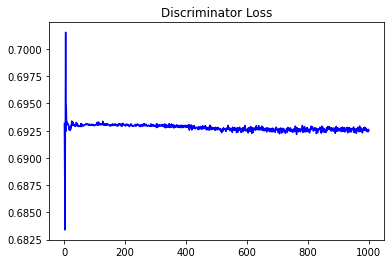

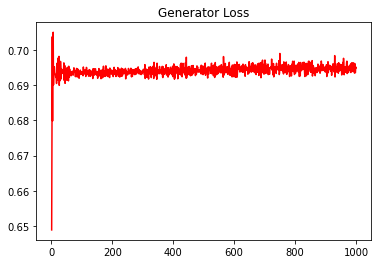

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.1476608030963274


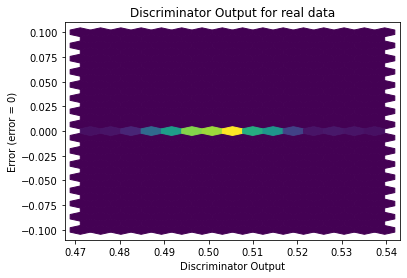

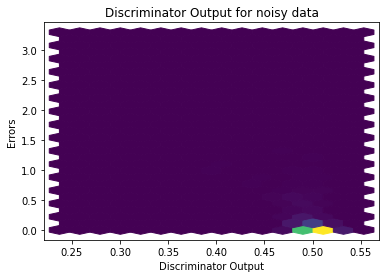

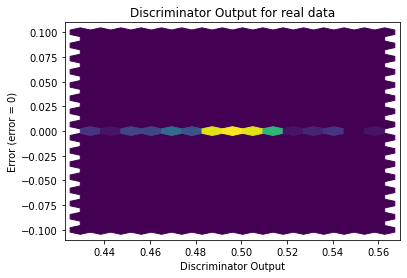

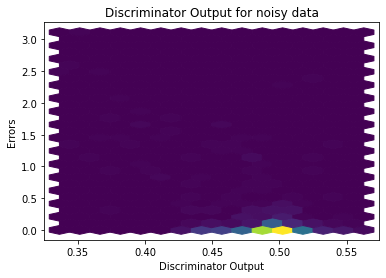

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


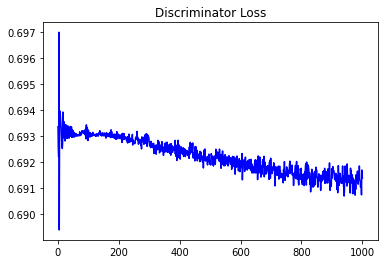

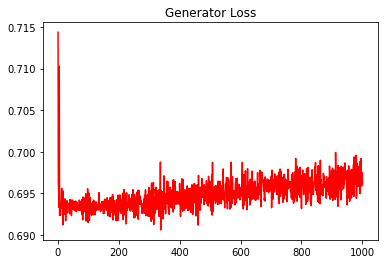

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.15621780461400075


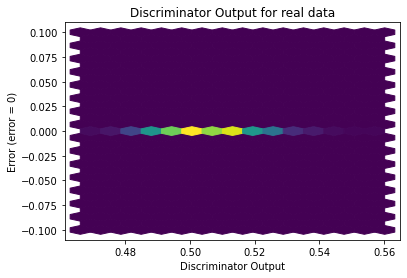

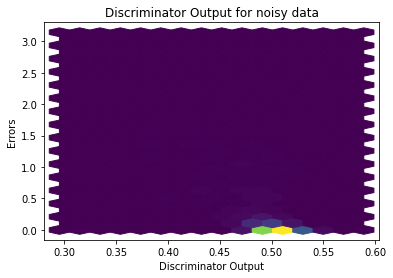

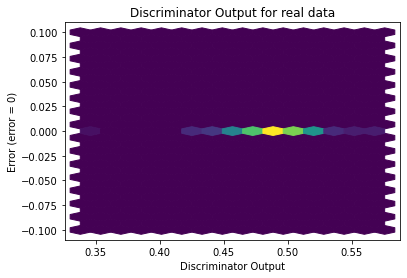

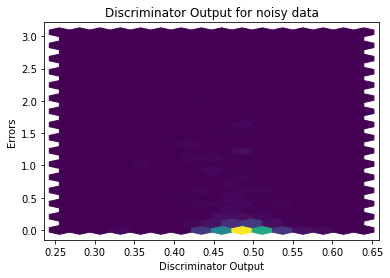

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1903]], requires_grad=True)
